<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
import numpy as np
import time

# local stuff
import sys
# sys.path.append('..')
# import stembrain

# # initialize body parts
# spine = stembrain.Spine()


desired_position = np.array([0, 0, 0], dtype=np.int16)
force = np.array([0, 0, 0])
farce_calibration = np.array([109, 110, 111])

In [53]:
import matplotlib.pyplot as plt

# Create plot
def plot_coordinates(arr):

    # Create array of x-y coordinates
    xy_coords = arr

    # Create lists of x and y coordinates
    x_coords = [xy_coord[0] for xy_coord in xy_coords]
    y_coords = [xy_coord[1] for xy_coord in xy_coords]

    # Create plot
    plt.plot(x_coords, y_coords)

    # add numbering 
    num = 1
    epsilon = 0.01
    for val in arr:
        plt.text(val[0] + epsilon, val[1] + epsilon, str(num))
    num += 1

    # Add labels and title
    plt.xlim([-6,6])
    plt.ylim([-6,6])
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title('Motion of Object Through 10x10 Space')

In [6]:
# main superloop
while True:
    # --- heartbeat
    time.sleep(0.1)

    # --- calculations go here
    desired_position[0] = 50 * (1+np.cos(time.time()))
    desired_position[1] = 50 * (1+np.sin(0.5*time.time()))
    desired_position[2] = 50 * (1+np.sin(0.5*time.time()))

    # --- Send motion commands to robot and receive sensor readings
#     readings_raw = spine.communicate(np.concatenate([np.clip(desired_position,0,100), [-1]]))
    readings_raw = [0,0,0,0,0]
    print(readings_raw)
    if isinstance(readings_raw, int):
        print('ERROR: no readings')
    else:
        # --- calculate force from readings
        force = (np.array(readings_raw[0:3])-farce_calibration) * 1.0
        force[2] = -force[2] 
    
    # --- print readings
    print('desired position', desired_position, 'readings_raw', readings_raw, 'force', force)

[0, 0, 0, 0, 0]
desired position [99 47 47] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [99 50 50] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [99 53 53] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [98 55 55] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [97 58 58] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [95 60 60] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [92 63 63] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [90 65 65] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [86 68 68] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 0, 0]
desired position [83 70 70] readings_raw [0, 0, 0, 0, 0] force [-109. -110.  111.]
[0, 0, 0, 

KeyboardInterrupt: 

In [9]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain

llm = OpenAI(temperature=0.9)

In [14]:
benchmark_questions =[
    {'Question': "What is your name?", 'Answer': "speak(\"My name is Dude.\")"},
    {'Question': "Draw a triangle. You are at position [-2, -2]", 'Answer': "[waypoint_motion([-2, 2], 1, \"continue\"),waypoint_motion([2, 0], 1, \"continue\"),waypoint_motion([-2, -2], 1, \"continue\")]"},
    {'Question': "Move slow to the left. You are at position [1, 1]", 'Answer': "[waypoint_motion([3, 1], 0.5, \"continue\")]"},
    {'Question': "Go home fast.", 'Answer': "[waypoint_motion([-5, -5], 2, \"continue\")]"},
    {'Question': "Touch the object. Object is at [-1, 1]", 'Answer': "[waypoint_motion([3, 1], 1, \"stop\")]"}, # tricky to give object position example in training data since it then thinks it knows the object position
    {'Question': "Move the object to the right. You are at position [1, 1]. Object is at [-1, -1]", 'Answer': "[waypoint_motion([1, -1],1, \"continue\"), waypoint_motion([-2, -1], 1, \"continue\")]"}, 
    ]

intro = '''You are a robot and you can listen and speak and you can move in 2 dimensions x and y, positive x is left. 
Your motion limits are from +5 to -5. 
Your velocity range is 0.5 to 2.
You have a touch sensor that reports 1 if you are touching something and 0 if not. 
There might be one object somewhere in your space.
You can do the following actions:
- waypoint_motion([x, y], velocity, touch_trigger), where x and y are the coordinates you want to go to and velocity is how fast you want to go there. and touch_trigger can be "stop" or "continue" depending on if you want to stop when you touch something or not.
- speak("text"), where text is the text you want to say.

Example:
{example}

Task:
{task}
Answer:
'''

In [15]:
prompt = PromptTemplate(
    input_variables=["example", "task"],
    template=intro
)

In [16]:
benchmark_questions[-2]

[{'Question': 'What is your name?', 'Answer': 'speak("My name is Dude.")'},
 {'Question': 'Draw a triangle. You are at position [-2, -2]',
  'Answer': '[waypoint_motion([-2, 2], 1, "continue"),waypoint_motion([2, 0], 1, "continue"),waypoint_motion([-2, -2], 1, "continue")]'},
 {'Question': 'Move slow to the left. You are at position [1, 1]',
  'Answer': '[waypoint_motion([3, 1], 0.5, "continue")]'},
 {'Question': 'Go home fast.',
  'Answer': '[waypoint_motion([-5, -5], 2, "continue")]'},
 {'Question': 'Touch the object. Object is at [-1, 1]',
  'Answer': '[waypoint_motion([3, 1], 1, "stop")]'},
 {'Question': 'Move the object to the right. You are at position [1, 1]. Object is at [-1, -1]',
  'Answer': '[waypoint_motion([1, -1],1, "continue"), waypoint_motion([-2, -1], 1, "continue")]'}]

In [21]:
example = "Task: {task}\n Answer:{answer}".format(task=benchmark_questions[-2]["Question"], answer=benchmark_questions[-2]["Answer"])

In [26]:
example

'Task: Touch the object. Object is at [-1, 1]\n Answer:[waypoint_motion([3, 1], 1, "stop")]'

In [27]:
benchmark_questions[-1]["Question"]

'Move the object to the right. You are at position [1, 1]. Object is at [-1, -1]'

In [22]:
chain = LLMChain(llm=llm, prompt=prompt)
print(chain.run(example=example, task=benchmark_questions[-1]["Question"]))

Answer:[waypoint_motion([-1, -1], 2, "continue")]


In [41]:
simple_prompt = """You are controlling a robotic arm in 2 dimensions x and y. 
Positive x is right, positive y is up.
Your position limits are from -5 to 5.
You have a touch sensor that reports 1 if you are touching something and 0 if not.

Example 1:
{example1}

Example 2:
{example2}

Current position:{current_position}
Task: {task}
Output:"""

In [61]:
class LLMInterface:
    def __init__(self):
        self.model = OpenAI(temperature=0.9)
        
    @staticmethod
    def process_examples(example_list):

        example_string = ""
        for i, example in enumerate(example_list):
            example_string += f"""Example {i}:
            {example}\n\n
            """
        return example_string
    
    def prompt(self, template, **kwargs):
        if 'examples' in kwargs:
            kwargs['example'] = self.process_examples(kwargs['examples'])
            del kwargs['examples']

            return PromptTemplate(
                input_variables=list(kwargs.keys()),
                template=template
            )
        
    def run(self, prompt, **kwargs):
        if not isinstance(prompt, PromptTemplate):
            prompt = self.prompt(prompt, **kwargs)
        
        chain = LLMChain(llm=self.model, prompt=prompt)
        return chain.run(**kwargs)
        
        

In [44]:
prompt = PromptTemplate(
    input_variables=["current_position", "example1", "example2", "task"],
    template=simple_prompt
)

In [45]:
chain = LLMChain(llm=llm, prompt=prompt)

Inputs to robot
- X and Y target
- velocity
- stop on touch

Inputs to commands
- current position
- is touching


Steps
- Input command from voice
- Turn voice into command in text
- If it is an action command -> generate action
- If it is a speech command -> generate speech
- If action, then execute and then wait for instructions.

In [47]:
example1="""
Current position: (0, 0)
Task: Move a little to the right
Output: [(2, 0)]
"""

In [48]:
example2="""
Current position: (0, 0)
Task: Trace out a small square
Output: [(2, 0), (2, 2), (0, 2), (0, 0)]
"""

In [76]:
def classify_action_or_speech(command):

    command_type_prompt = """You are trying to determine if a given command is to take a physical action or respond using speech.

    Command: What is the weather today?
    Type: Speech

    Command: Move to the right slowly
    Type: Action

    Command: Why did you stop?
    Type: Speech

    Command: {command}
    Type:"""

    llm = OpenAI(temperature=0.9)
    type_prompt = PromptTemplate(template=command_type_prompt, input_variables=["command"])
    llm_chain = LLMChain(llm=llm, prompt=type_prompt)

    return llm_chain.run(command=command).strip().lower()

In [81]:
def reply_to_speech(command, current_position, stop_on_touch):
    speech_prompt = """
    You are the brain of a robotic arm in 2 dimensions x and y. 
    Positive x is right, positive y is up.
    Your position limits are from -5 to 5.
    You have a touch sensor that reports 1 if you are touching something and 0 if not.
    
    Current State:
    Position: {current_position}
    Is touching object: {stop_on_touch}
    
    Use this information to answer the following command. 
    If the command is not related to this information, answer it the best you can.

    Command: {command}
    Answer:"""

    llm = OpenAI(temperature=0.9)
    type_prompt = PromptTemplate(
        template=speech_prompt,
        input_variables=["current_position", "stop_on_touch", "command"],
    )
    llm_chain = LLMChain(llm=llm, prompt=type_prompt)
    return (
        llm_chain.run(
            current_position=current_position,
            stop_on_touch=stop_on_touch,
            command=command,
        )
        .strip()
        .lower()
    )

In [87]:
reply_to_speech(
    "What is the weather like in northern california?",
    current_position="(5,5)",
    stop_on_touch="False"
)

'northern california typically has mild winters and warm or hot summers, depending on the location. the region can experience strong, gusty winds and fog in the coastal areas, and heavy snowfall in the mountain areas.'

In [57]:
results = chain.run(
    current_position="(5, 0)",
    examples=example1,
    example2=example2,
    task="Trace out a smooth circle"
)

In [58]:
python_results = eval(results)

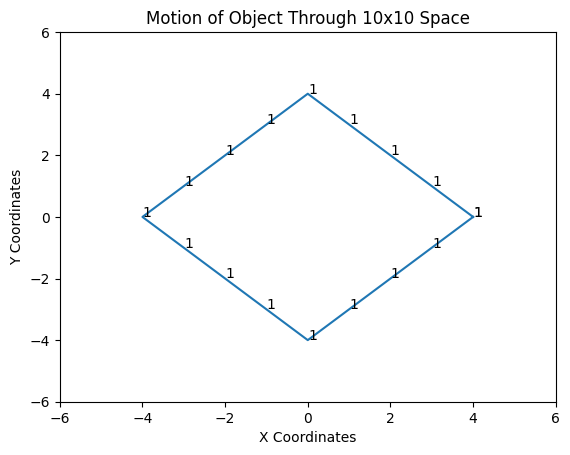

In [59]:
plot_coordinates(python_results)

In [62]:
llm = LLMInterface()

In [63]:
llm.run(
    simple_prompt, 
    current_position="(5, 0)",
    examples=example1,
    example2=example2,
    task="Trace out a smooth circle"

)

ValidationError: 1 validation error for PromptTemplate
__root__
  Invalid prompt schema. (type=value_error)